In [1]:
# path to the dataset
organic_image = r".source\Waste Classification Dataset\Waste Classification Dataset\waste_dataset\organic"
recyclable_image = r".source\Waste Classification Dataset\Waste Classification Dataset\waste_dataset"

In [2]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

c:\Users\jules\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


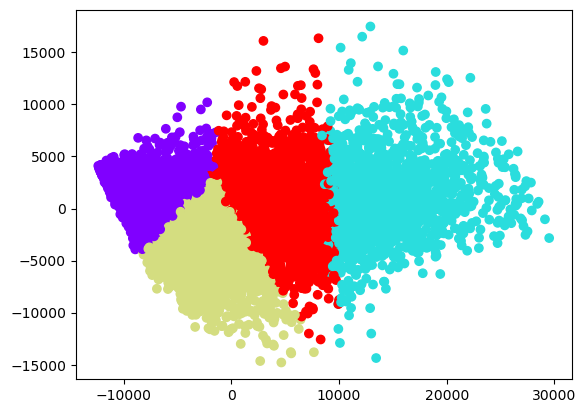

In [3]:
sub_directories = ['recyclable']

for directory in sub_directories:
    folder_path = os.path.join(recyclable_image, directory)

    data = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        
        if image is not None:
            width = 100  # specify the desired width
            height = 100  # specify the desired height
            image = cv2.resize(image, (width, height))
            
            image_data = np.array(image.flatten(), dtype=np.float64)
            data.append(image_data)
        
    if not data:
        print(f"Aucune donnée trouvée dans le dossier '{directory}'.")
        continue

    data = np.array(data)  # Convert data list to numpy array
    kmeans = KMeans(n_clusters=4)
    clusters = kmeans.fit_predict(data)

pca =   PCA(n_components=2)
pca_2d = pca.fit_transform(data)

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=clusters, cmap='rainbow')
plt.show()


0


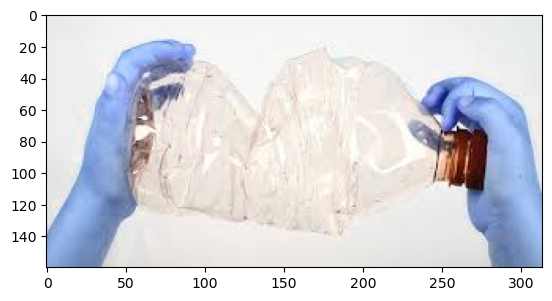

0


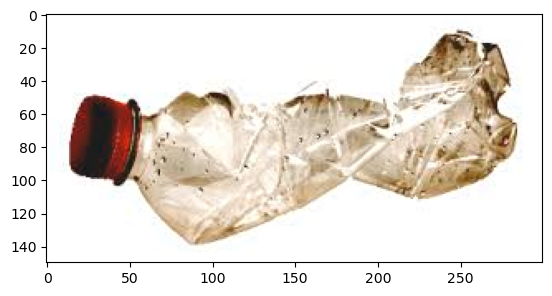

3


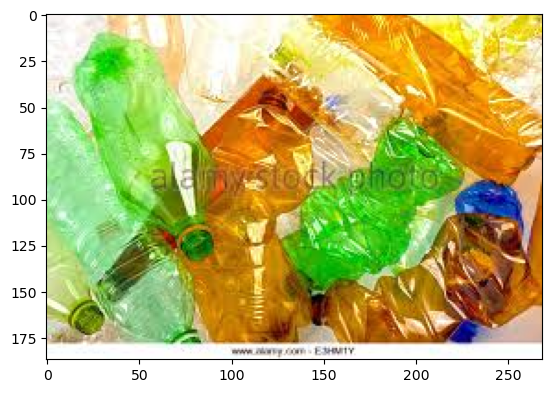

1


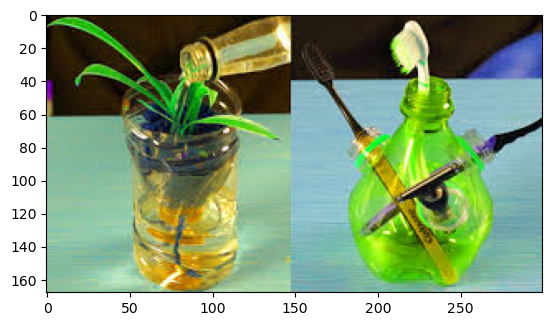

1


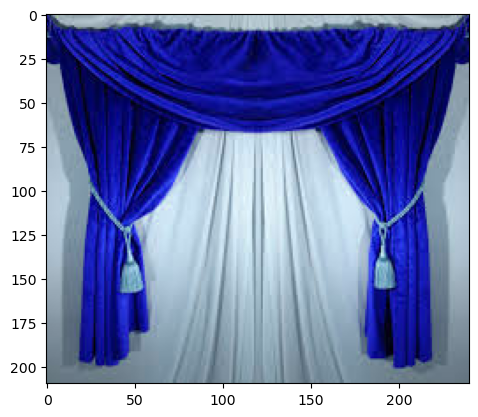

3


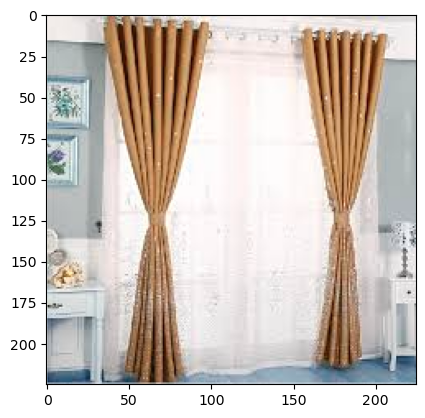

In [4]:
i = 0
for directory in sub_directories:
    folder_path = os.path.join(recyclable_image, directory)

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        print(clusters[i])
        plt.imshow(image)
        plt.show()
        i += 1
        if i > 5:
            break
        


In [5]:
data = np.array(data)  # Convert data list to numpy array
data.shape

(10825, 30000)